<a href="https://colab.research.google.com/github/vinceriot/computervision/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работ №4
Голдобин Денис ФИТ-1-21

## Часть A
установка библиотеки

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 30.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolo11n.pt")


0: 416x640 2 dogs, 94.0ms
Speed: 23.6ms preprocess, 94.0ms inference, 1012.4ms postprocess per image at shape (1, 3, 416, 640)


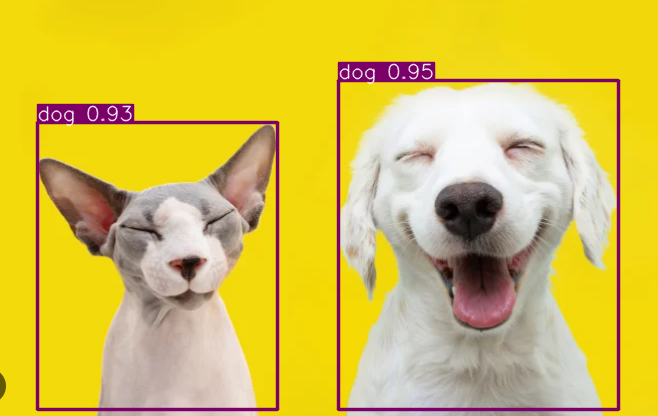

'result.jpg'

In [ ]:
results = model(["what.png"])
result=results[0]
boxes = result.boxes
obb = result.obb
result.show()
result.save(filename="result.jpg")

In [ ]:
for box in boxes:
  print(result.names[box.cls.item()])
  print(round(box.conf.item(),2))
  print([round(el,2) for el in box.xyxy.tolist()[0]])

dog
0.95
[338.8, 80.32, 618.65, 409.82]
dog
0.93
[37.14, 122.44, 277.86, 409.84]


## Часть Б

In [4]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [5]:
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:

rf = Roboflow(api_key="rQie7H5t56dh4MOtTBcL")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
rf = Roboflow(api_key="zbT6xIXBm8TD84FpzQkE")
project = rf.workspace("cv-390lk").project("test-0kyke")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
os.environ['WANDB_MODE']='disabled'

In [ ]:


# Load the model.
model = YOLO('yolo11n.pt')

# Training.
results = model.train(
   data='/content/test-1/data.yaml',
   imgsz=640,
   epochs=100,
   device = 0,
   name='yolov11m_vagons'
)

New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/test-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov11m_vagons5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

train: Scanning /content/test-1/train/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3956, len(boxes) = 7314. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/test-1/valid/labels.cache... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 375, len(boxes) = 705. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov11m_vagons5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11m_vagons5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.72G      1.438      2.254      1.584         45        640: 100%|██████████| 111/111 [00:41<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        165        705      0.772      0.409      0.409      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.55G      1.419       1.67       1.54         49        640: 100%|██████████| 111/111 [00:39<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


                   all        165        705       0.65      0.369      0.345      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.56G      1.426      1.586      1.537         32        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]

                   all        165        705      0.353      0.486      0.389      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.58G      1.401      1.518      1.527         49        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        165        705      0.453      0.397      0.408      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.56G      1.387      1.451      1.503         35        640: 100%|██████████| 111/111 [00:39<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        165        705      0.396      0.546       0.45      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.65G      1.347      1.411      1.477         57        640: 100%|██████████| 111/111 [00:39<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]


                   all        165        705      0.482      0.543      0.479       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.55G      1.325       1.35      1.462         46        640: 100%|██████████| 111/111 [00:42<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        165        705      0.445      0.508      0.441      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.55G      1.312      1.331      1.446         37        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        165        705      0.511      0.544      0.503      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.56G      1.274      1.289      1.426         35        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]


                   all        165        705       0.42      0.527      0.463      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.56G      1.287      1.284       1.43         55        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        165        705      0.467      0.544      0.482      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.56G      1.257      1.243      1.414         56        640: 100%|██████████| 111/111 [00:38<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        165        705      0.525      0.566      0.507      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.58G      1.255      1.221      1.415         56        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all        165        705      0.531      0.527      0.506       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.55G      1.223      1.205      1.389         38        640: 100%|██████████| 111/111 [00:39<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        165        705      0.498      0.589      0.519      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.58G      1.219       1.19      1.386         32        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all        165        705      0.523      0.543      0.511      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.55G      1.209      1.182      1.381         34        640: 100%|██████████| 111/111 [00:39<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]


                   all        165        705      0.515      0.566      0.511      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.55G      1.198      1.173      1.375         34        640: 100%|██████████| 111/111 [00:38<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        165        705      0.495      0.598      0.525      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.56G      1.178      1.141      1.352         34        640: 100%|██████████| 111/111 [00:38<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        165        705      0.457      0.565      0.503        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.55G      1.168      1.132      1.356         51        640: 100%|██████████| 111/111 [00:37<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]


                   all        165        705      0.562      0.575      0.534      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.55G      1.159      1.119       1.35         43        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all        165        705      0.521      0.561      0.513       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.57G      1.146      1.111      1.336         52        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        165        705      0.568      0.606      0.545      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.52G      1.148      1.098      1.344         58        640: 100%|██████████| 111/111 [00:38<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        165        705      0.518      0.587      0.522      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.55G      1.134      1.083      1.327         39        640: 100%|██████████| 111/111 [00:40<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        165        705      0.489      0.576      0.503      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.56G      1.124      1.091      1.334         57        640: 100%|██████████| 111/111 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        165        705      0.507      0.585      0.504      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.55G       1.13       1.07      1.328         46        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all        165        705      0.484      0.615      0.522      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.55G      1.108      1.056      1.329         36        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]

                   all        165        705      0.518      0.605      0.527      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.52G      1.117      1.061      1.323         51        640: 100%|██████████| 111/111 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.40it/s]

                   all        165        705      0.473      0.597      0.497      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.59G      1.103      1.045      1.313         41        640: 100%|██████████| 111/111 [00:39<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.52it/s]

                   all        165        705       0.49      0.555      0.483      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.58G      1.085      1.029      1.298         44        640: 100%|██████████| 111/111 [00:39<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        165        705      0.552      0.576      0.538      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.52G      1.094      1.028      1.304         38        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all        165        705       0.51      0.582      0.515      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.58G      1.079      1.015      1.298         44        640: 100%|██████████| 111/111 [00:41<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

                   all        165        705      0.499      0.571      0.513      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.52G      1.062      1.006      1.286         68        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        165        705      0.534      0.528      0.497      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.58G      1.062     0.9891      1.285         45        640: 100%|██████████| 111/111 [00:39<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        165        705      0.538      0.586      0.527       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.55G      1.056     0.9864      1.283         29        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        165        705      0.588      0.551      0.514      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.55G      1.055     0.9808      1.281         63        640: 100%|██████████| 111/111 [00:38<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.53it/s]

                   all        165        705      0.523      0.574      0.501      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.55G      1.049     0.9671      1.277         46        640: 100%|██████████| 111/111 [00:38<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]

                   all        165        705      0.531      0.538      0.495      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.59G      1.027     0.9556      1.263         38        640: 100%|██████████| 111/111 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]


                   all        165        705      0.546      0.578      0.524      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.56G      1.022     0.9467       1.26         47        640: 100%|██████████| 111/111 [00:42<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        165        705      0.512      0.571      0.518      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.55G      1.015     0.9158      1.249         49        640: 100%|██████████| 111/111 [00:39<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        165        705      0.502      0.579      0.504      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.59G      1.019     0.9223      1.255         59        640: 100%|██████████| 111/111 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.44it/s]

                   all        165        705      0.486      0.548        0.5      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.55G       1.01     0.9087      1.248         33        640: 100%|██████████| 111/111 [00:40<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]

                   all        165        705      0.607      0.495      0.501      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.59G      1.002     0.9166      1.248         42        640: 100%|██████████| 111/111 [00:40<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all        165        705      0.521      0.571      0.521      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.52G     0.9949     0.8981      1.238         54        640: 100%|██████████| 111/111 [00:40<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

                   all        165        705      0.519      0.546      0.503      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.52G     0.9901     0.8888      1.239         39        640: 100%|██████████| 111/111 [00:39<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]

                   all        165        705      0.567      0.515      0.508       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.56G     0.9865      0.883      1.237         43        640: 100%|██████████| 111/111 [00:42<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]


                   all        165        705      0.519      0.565      0.504      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.55G     0.9902      0.885      1.235         43        640: 100%|██████████| 111/111 [00:40<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]


                   all        165        705      0.513      0.597      0.501      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.53G      0.966     0.8699      1.225         29        640: 100%|██████████| 111/111 [00:40<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

                   all        165        705      0.534      0.566      0.498      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.55G     0.9722     0.8598      1.227         37        640: 100%|██████████| 111/111 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        165        705      0.507      0.553      0.505      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.55G     0.9614     0.8494      1.215         51        640: 100%|██████████| 111/111 [00:38<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        165        705        0.6        0.5      0.505      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.55G     0.9579     0.8349      1.211         43        640: 100%|██████████| 111/111 [00:39<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all        165        705      0.548      0.537      0.509       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.55G     0.9474      0.829       1.21         44        640: 100%|██████████| 111/111 [00:39<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]

                   all        165        705      0.525      0.565      0.503      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.55G     0.9296     0.8212      1.196         58        640: 100%|██████████| 111/111 [00:41<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.16it/s]

                   all        165        705      0.507      0.568      0.495       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.57G     0.9407     0.8233      1.205         53        640: 100%|██████████| 111/111 [00:39<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        165        705       0.52       0.57      0.491      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.55G     0.9333     0.8137      1.203         36        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]

                   all        165        705      0.537      0.549      0.512       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.56G     0.9391     0.8178      1.205         30        640: 100%|██████████| 111/111 [00:40<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all        165        705      0.486      0.575      0.491      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.55G     0.9236     0.7949      1.195         32        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.37it/s]

                   all        165        705      0.596      0.518       0.51       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.57G     0.9271     0.8029      1.197         50        640: 100%|██████████| 111/111 [00:39<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        165        705      0.522      0.532      0.486      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.55G     0.9133     0.7738      1.182         47        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        165        705      0.511      0.586      0.483       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.52G     0.9019     0.7766      1.175         43        640: 100%|██████████| 111/111 [00:41<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


                   all        165        705      0.553      0.543        0.5      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.55G     0.9011     0.7749      1.179         57        640: 100%|██████████| 111/111 [00:41<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        165        705      0.527      0.501      0.464      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.53G     0.8859     0.7677      1.172         38        640: 100%|██████████| 111/111 [00:39<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all        165        705      0.485      0.536      0.479      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.55G     0.8871     0.7575      1.173         37        640: 100%|██████████| 111/111 [00:39<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]


                   all        165        705      0.548      0.532      0.501      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.52G      0.873     0.7485      1.164         60        640: 100%|██████████| 111/111 [00:39<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]

                   all        165        705      0.594      0.503       0.49      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.55G     0.8767     0.7547      1.165         35        640: 100%|██████████| 111/111 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.31it/s]

                   all        165        705      0.528      0.495      0.482      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.55G     0.8809     0.7473      1.172         56        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]

                   all        165        705       0.49      0.543       0.48       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.56G     0.8806     0.7468      1.168         42        640: 100%|██████████| 111/111 [00:39<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]


                   all        165        705       0.54      0.551      0.508      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.58G     0.8746     0.7344      1.167         39        640: 100%|██████████| 111/111 [00:45<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.22it/s]

                   all        165        705       0.54      0.524      0.493      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.53G     0.8603     0.7248      1.157         37        640: 100%|██████████| 111/111 [00:38<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.19it/s]

                   all        165        705      0.547      0.515      0.502      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.55G     0.8678      0.736      1.165         72        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]


                   all        165        705      0.492      0.565      0.503      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.55G     0.8504     0.7211      1.145         49        640: 100%|██████████| 111/111 [00:38<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]


                   all        165        705      0.521      0.522       0.49      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.64G     0.8485     0.7116       1.15         41        640: 100%|██████████| 111/111 [00:38<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        165        705      0.541      0.529      0.483      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.57G     0.8471     0.7144      1.153         54        640: 100%|██████████| 111/111 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        165        705      0.524      0.515      0.482      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.55G     0.8299     0.6949      1.134         44        640: 100%|██████████| 111/111 [00:38<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]

                   all        165        705       0.53      0.525       0.49      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.58G     0.8274     0.6973      1.133         38        640: 100%|██████████| 111/111 [00:43<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]


                   all        165        705      0.588      0.526       0.51      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.52G     0.8247     0.6952      1.136         42        640: 100%|██████████| 111/111 [00:39<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]

                   all        165        705       0.56      0.515      0.506      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.52G     0.8217     0.6854      1.129         59        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]

                   all        165        705      0.545      0.537      0.502      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.53G     0.8224      0.679       1.13         28        640: 100%|██████████| 111/111 [00:37<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]

                   all        165        705      0.518      0.548      0.488      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.55G     0.8043     0.6713      1.128         46        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]


                   all        165        705      0.565      0.508      0.496      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.55G     0.8037     0.6535      1.118         47        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        165        705      0.571      0.521        0.5      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.55G     0.7951     0.6555      1.117         37        640: 100%|██████████| 111/111 [00:39<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        165        705      0.502      0.588      0.501      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.58G     0.8053      0.667      1.127         27        640: 100%|██████████| 111/111 [00:41<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.32it/s]

                   all        165        705      0.516      0.527       0.48      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.55G     0.7905     0.6473      1.114         33        640: 100%|██████████| 111/111 [00:38<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all        165        705      0.544      0.525      0.493      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.55G     0.7859     0.6455      1.108         53        640: 100%|██████████| 111/111 [00:38<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]


                   all        165        705       0.52       0.51       0.49      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.55G     0.7767     0.6471       1.11         47        640: 100%|██████████| 111/111 [00:37<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]

                   all        165        705      0.577      0.503      0.489      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.52G     0.7798     0.6357      1.104         54        640: 100%|██████████| 111/111 [00:38<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        165        705      0.544      0.495      0.475      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.58G     0.7813     0.6338      1.103         47        640: 100%|██████████| 111/111 [00:38<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        165        705      0.505       0.54      0.488      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.6G     0.7681     0.6325      1.104         40        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        165        705      0.518      0.552      0.483      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.55G     0.7702     0.6327      1.105         62        640: 100%|██████████| 111/111 [00:43<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]

                   all        165        705      0.531      0.538      0.482      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.58G     0.7575     0.6184      1.095         42        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        165        705      0.528      0.548      0.491      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.52G     0.7682      0.623      1.096         36        640: 100%|██████████| 111/111 [00:39<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]


                   all        165        705      0.561      0.536      0.496      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.56G     0.7597     0.6154       1.09         47        640: 100%|██████████| 111/111 [00:40<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all        165        705      0.546      0.535      0.484      0.315


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.58G     0.7517     0.5618      1.093         22        640: 100%|██████████| 111/111 [00:39<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        165        705      0.535      0.547      0.477      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.52G     0.7257     0.5182      1.075         23        640: 100%|██████████| 111/111 [00:38<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        165        705      0.528      0.532      0.479      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.51G     0.7081     0.5097      1.064         23        640: 100%|██████████| 111/111 [00:39<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.47it/s]

                   all        165        705      0.543      0.504      0.471      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.51G     0.7027     0.5071      1.065         23        640: 100%|██████████| 111/111 [00:44<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]


                   all        165        705      0.516      0.563      0.477      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.51G     0.6919     0.4958      1.051         23        640: 100%|██████████| 111/111 [00:38<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

                   all        165        705      0.533       0.54      0.482       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.51G     0.6889     0.4907      1.043         24        640: 100%|██████████| 111/111 [00:38<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        165        705      0.545      0.532      0.482      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.51G      0.681      0.487      1.047         22        640: 100%|██████████| 111/111 [00:37<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]

                   all        165        705       0.54      0.531      0.483      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.51G     0.6772     0.4767      1.041         24        640: 100%|██████████| 111/111 [00:37<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        165        705       0.51       0.56       0.48      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.51G     0.6706     0.4825      1.039         17        640: 100%|██████████| 111/111 [00:38<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        165        705       0.54      0.526      0.478      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.51G     0.6726      0.478      1.035         21        640: 100%|██████████| 111/111 [00:37<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        165        705      0.547      0.526      0.479      0.311



100 epochs completed in 1.183 hours.
Optimizer stripped from runs/detect/yolov11m_vagons5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolov11m_vagons5/weights/best.pt, 5.5MB

Validating runs/detect/yolov11m_vagons5/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]


                   all        165        705      0.568      0.605      0.545      0.347
                  body        164        223      0.847      0.888      0.925      0.657
              coupling         89        107      0.385      0.206        0.2      0.104
                wheels        164        375      0.471      0.723      0.509      0.278
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/yolov11m_vagons5


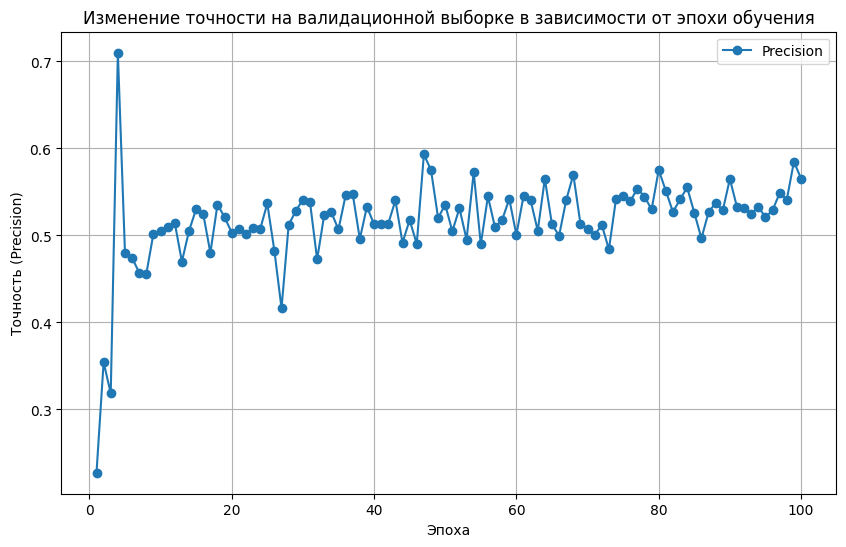

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение CSV файла с результатами обучения
df = pd.read_csv('/content/results.csv')

# Получаем номера эпох и значения метрики precision
epochs = df['epoch']
precision = df['metrics/precision(B)']

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, marker='o', label='Precision')

# Настройка графика
plt.title('Изменение точности на валидационной выборке в зависимости от эпохи обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность (Precision)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
best_model = YOLO('/content/best.pt')

In [13]:
results = best_model(["/content/4d05f6f7fdbf.jpg","/content/a0e68cac6c58d31c8e441ad02f7d99ce.jpg"])


0: 640x640 3 bodys, 3 wheelss, 45.8ms
1: 640x640 2 bodys, 1 coupling, 2 wheelss, 45.8ms
Speed: 3.6ms preprocess, 45.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
result=results[0]

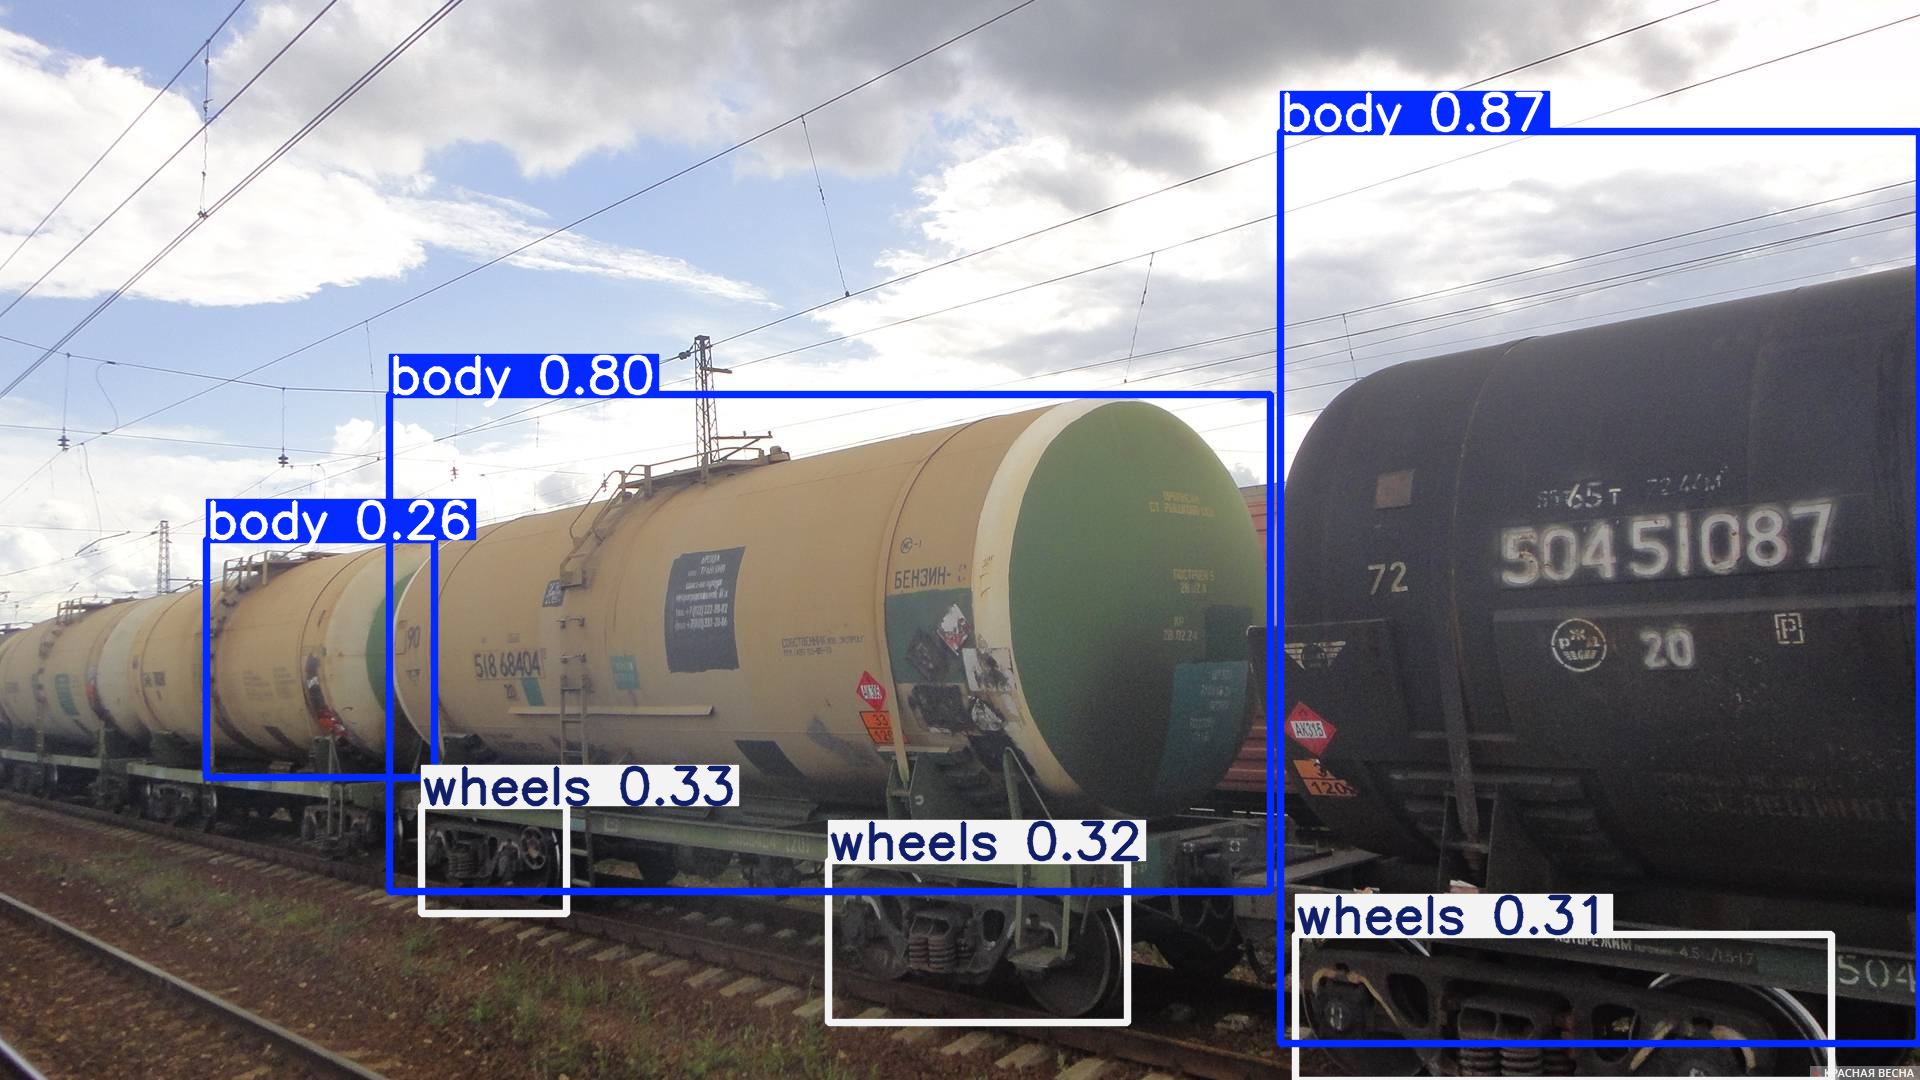

'result_1.jpg'

In [15]:
boxes = result.boxes  # Boxes object for bounding box outputs
obb = result.obb  # Oriented boxes object for OBB outputs
result.show()  # display to screen
result.save(filename="result_1.jpg")  # save to disk

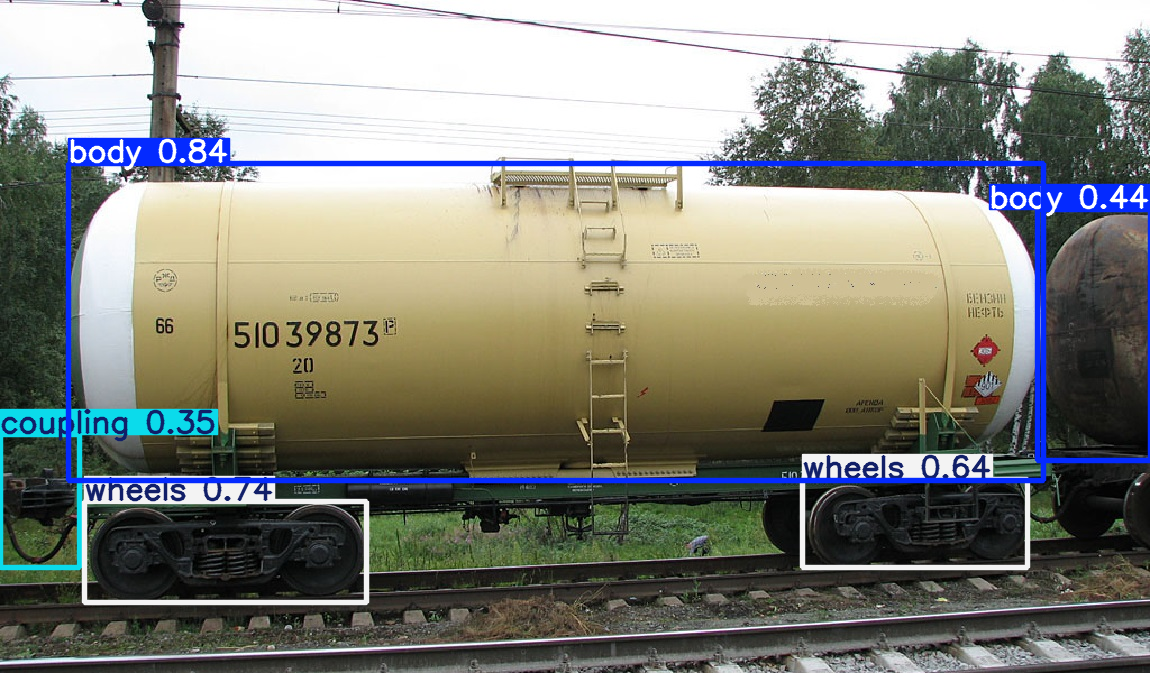

'result_2.jpg'

In [16]:
result=results[1]
boxes = result.boxes  # Boxes object for bounding box outputs
obb = result.obb  # Oriented boxes object for OBB outputs
result.show()  # display to screen
result.save(filename="result_2.jpg")  # save to disk

In [17]:
for box in boxes:
  print(result.names[box.cls.item()])
  print(round(box.conf.item(),2))
  print([round(el,2) for el in box.xyxy.tolist()[0]])

body
0.84
[68.68, 163.9, 1043.55, 480.62]
wheels
0.74
[84.84, 501.94, 366.02, 602.27]
wheels
0.64
[802.68, 479.56, 1027.75, 567.33]
body
0.44
[1037.67, 209.64, 1150.0, 460.4]
coupling
0.35
[0.0, 434.17, 79.68, 567.36]
